In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pgeocode

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [198]:
sold = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_treated.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string'}, parse_dates = ['prev_sold_date'])

In [199]:
# Add lat/long columns based on zip code
nomi = pgeocode.Nominatim('us')
location_data = nomi.query_postal_code(sold['zip_code'].tolist())
sold['latzip'] = location_data['latitude'].values
sold['longzip'] = location_data['longitude'].values

In [200]:
# One hot encode state column
sold_dummy = pd.get_dummies(sold['state']).astype('int')
# enc = OneHotEncoder(sparse_output=False).astype('int')
# col = sold[['state']]
# enc_col = enc.fit_transform(col)
# state_df = pd.DataFrame(enc_col)
sold = pd.concat([sold, sold_dummy], axis = 1)

In [201]:
# Frequency encode city, street and broker
sold['cityfreq'] = sold['city'].map(sold['city'].value_counts())
sold['streetfreq'] = sold['street'].map(sold['street'].value_counts())
sold['brokerfreq'] = sold['brokered_by'].map(sold['brokered_by'].value_counts())

In [202]:
# Split train/val and test before modelling
sold_train, sold_test = train_test_split(sold, test_size = 0.2, random_state=1)

Linear Regression (main dataset variables only)

In [203]:
X = sold_train[['bed', 'bath', 'acre_lot', 'house_size', 'latzip', 'longzip', 'cityfreq', 'streetfreq', 'brokerfreq', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
y = sold_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

R^2 0.4594368454723302
RMSE 363049.3468927382
MAE 212114.25748569053


Text(0, 0.5, 'Predicted')

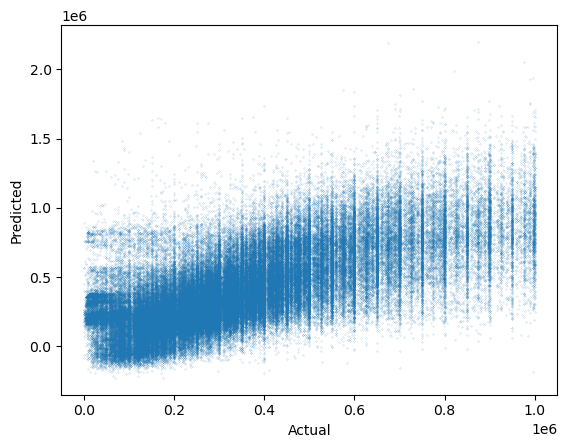

In [204]:
print('R^2', model.score(X_val, y_val))
print('RMSE', root_mean_squared_error(y_val, y_val_pred))
print('MAE', mean_absolute_error(y_val, y_val_pred))
plt.scatter(y_val[y_val < 1000000], y_val_pred[y_val < 1000000], s = 0.01)
# plt.plot([min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))],[min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(pd.DataFrame({'feature':model.feature_names_in_, 'coeff':model.coef_, 'abs_coeff':abs(model.coef_)}).sort_values('abs_coeff', ascending = False))
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

,feature,coeff,abs_coeff
52,Utah,688827.955861,688827.955861
16,District of Columbia,501624.858395,501624.858395
29,Massachusetts,473801.522492,473801.522492
40,New York,366246.150791,366246.150791
51,Texas,-351644.071873,351644.071873
26,Louisiana,-326902.200670,326902.200670
39,New Mexico,-316102.678168,316102.678168
37,New Hampshire,302871.883854,302871.883854
32,Mississippi,-296670.936006,296670.936006
47,Rhode Island,286094.019161,286094.019161


Linear Regression Model (baseline + climate variables)

In [206]:
X = sold_train[['bed', 'bath', 'acre_lot', 'house_size', 'latzip', 'longzip', 'cityfreq', 'streetfreq', 'brokerfreq', 'precipitation', 'maxtemp', 'mintemp', 'avgtemp', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
y = sold_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

R^2 0.4944943487438648
RMSE 351079.48063936684
MAE 205990.10762577198


Text(0, 0.5, 'Predicted')

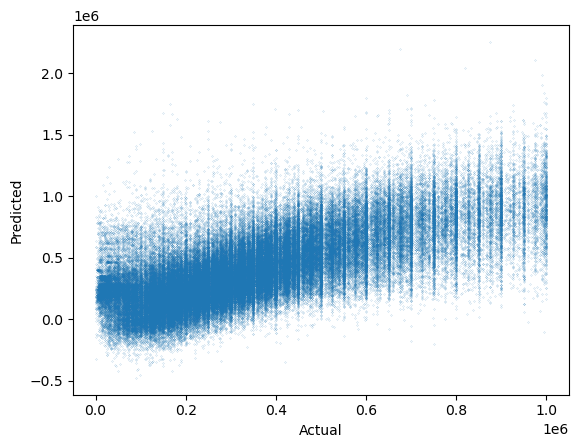

In [207]:
print('R^2', model.score(X_val, y_val))
print('RMSE', root_mean_squared_error(y_val, y_val_pred))
print('MAE', mean_absolute_error(y_val, y_val_pred))

plt.scatter(y_val[y_val < 1000000], y_val_pred[y_val < 1000000], s = 0.01)
# plt.plot([min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))],[min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [208]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(pd.DataFrame({'feature':model.feature_names_in_, 'coeff':model.coef_, 'abs_coeff':abs(model.coef_)}).sort_values('abs_coeff', ascending = False))
pd.reset_option('display.max_columns')

,feature,coeff,abs_coeff
23,Hawaii,-794961.300366,794961.300366
56,Utah,553614.797995,553614.797995
20,District of Columbia,521516.707292,521516.707292
33,Massachusetts,477130.087384,477130.087384
30,Louisiana,-353976.171579,353976.171579
55,Texas,-347990.024334,347990.024334
62,Wyoming,-332980.015592,332980.015592
41,New Hampshire,321137.446183,321137.446183
44,New York,262832.612529,262832.612529
57,Vermont,258902.750562,258902.750562


Linear Regression Model (baseline + facilities/demographic variables)

In [209]:
X = sold_train[['bed', 'bath', 'acre_lot', 'house_size', 'latzip', 'longzip', 'cityfreq', 'streetfreq', 'brokerfreq', 'po_box', 'population', 'density', 'dhighway', 'dlairport', 'dmairport', 'dshore', 'nobusiness', 'totalincome', 'adjustedincome', 'tax_returns', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
y = sold_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

R^2 0.6019764479739904
RMSE 311527.8122556024
MAE 184611.40803146255


Text(0, 0.5, 'Predicted')

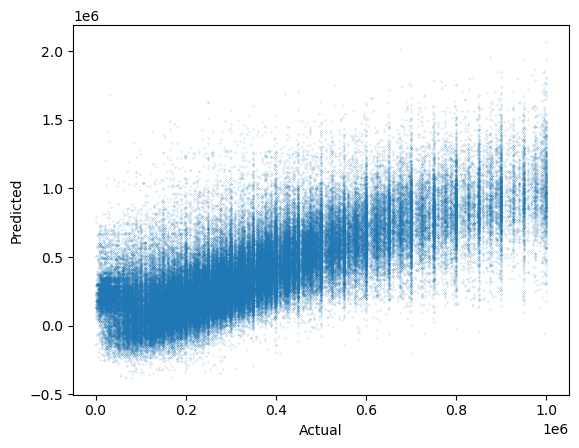

In [210]:
print('R^2', model.score(X_val, y_val))
print('RMSE', root_mean_squared_error(y_val, y_val_pred))
print('MAE', mean_absolute_error(y_val, y_val_pred))

plt.scatter(y_val[y_val < 1000000], y_val_pred[y_val < 1000000], s = 0.01)
# plt.plot([min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))],[min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [211]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(pd.DataFrame({'feature':model.feature_names_in_, 'coeff':model.coef_, 'abs_coeff':abs(model.coef_)}).sort_values('abs_coeff', ascending = False))
pd.reset_option('display.max_columns')

,feature,coeff,abs_coeff
63,Utah,460923.003443,460923.003443
40,Massachusetts,427254.604411,427254.604411
48,New Hampshire,340025.209984,340025.209984
62,Texas,-318670.536857,318670.536857
64,Vermont,301096.988501,301096.988501
21,Arizona,-276653.471085,276653.471085
51,New York,274220.720977,274220.720977
58,Rhode Island,273964.399499,273964.399499
69,Wyoming,-261673.709049,261673.709049
25,Connecticut,253527.975983,253527.975983


Linear Regression Model (all variables)

In [212]:
X = sold_train[['bed', 'bath', 'acre_lot', 'house_size', 'latzip', 'longzip', 'cityfreq', 'streetfreq', 'brokerfreq', 'precipitation', 'maxtemp', 'mintemp', 'avgtemp', 'po_box', 'population', 'density', 'dhighway', 'dlairport', 'dmairport', 'dshore', 'nobusiness', 'totalincome', 'adjustedincome', 'tax_returns', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
y = sold_train['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

R^2 0.6066273720311042
RMSE 309702.355327632
MAE 182449.0914626042


Text(0, 0.5, 'Predicted')

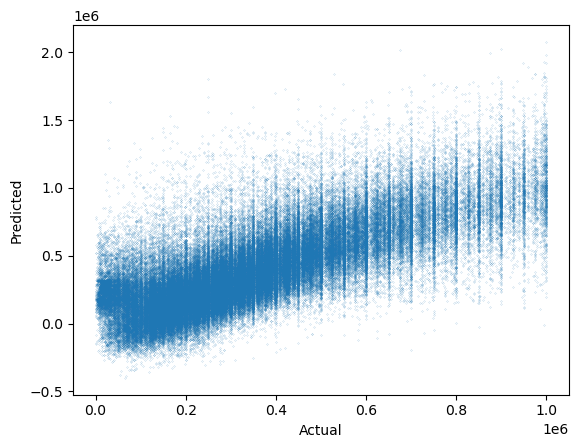

In [213]:
print('R^2', model.score(X_val, y_val))
print('RMSE', root_mean_squared_error(y_val, y_val_pred))
print('MAE', mean_absolute_error(y_val, y_val_pred))

plt.scatter(y_val[y_val < 1000000], y_val_pred[y_val < 1000000], s = 0.01)
# plt.plot([min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))],[min(min(y_val), min(y_val_pred)), max(max(y_val), max(y_val_pred))], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [214]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(pd.DataFrame({'feature':model.feature_names_in_, 'coeff':model.coef_, 'abs_coeff':abs(model.coef_)}).sort_values('abs_coeff', ascending = False))
pd.reset_option('display.max_columns')

,feature,coeff,abs_coeff
44,Massachusetts,403850.902043,403850.902043
34,Hawaii,-356880.864981,356880.864981
73,Wyoming,-346117.384874,346117.384874
67,Utah,342029.172136,342029.172136
52,New Hampshire,301386.228456,301386.228456
66,Texas,-293625.231608,293625.231608
31,District of Columbia,256926.634107,256926.634107
62,Rhode Island,239857.383766,239857.383766
68,Vermont,232021.038293,232021.038293
29,Connecticut,231672.938433,231672.938433
